# Titanic - Exploratory Data Analysis (EDA)

このノートブックでは、Titanicコンペのデータを探索し、理解を深めます。

## 目標
- データの基本情報を把握
- 欠損値の確認
- 生存率の分析（性別、年齢、クラス別）
- 特徴量間の関係を可視化

In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 表示設定
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## 1. データの読み込み

In [2]:
# データの読み込み
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

print(f'訓練データサイズ: {train.shape}')
print(f'テストデータサイズ: {test.shape}')

訓練データサイズ: (891, 12)
テストデータサイズ: (418, 11)


In [3]:
# 最初の数行を確認
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. データの基本情報

### カラムの説明
- **PassengerId**: 乗客ID
- **Survived**: 生存フラグ（0 = 死亡, 1 = 生存）← **目的変数**
- **Pclass**: チケットクラス（1 = 1st, 2 = 2nd, 3 = 3rd）
- **Name**: 名前
- **Sex**: 性別
- **Age**: 年齢
- **SibSp**: 同乗している兄弟・配偶者の数
- **Parch**: 同乗している親・子供の数
- **Ticket**: チケット番号
- **Fare**: 運賃
- **Cabin**: 客室番号
- **Embarked**: 乗船港（C = Cherbourg, Q = Queenstown, S = Southampton）

In [4]:
# データ型と欠損値の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 基本統計量
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. 欠損値の確認

In [ ]:
# 欠損値の数と割合
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: '欠損数', 1: '欠損率(%)'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '欠損率(%)', ascending=False).round(1)
    print(f"欠損値があるカラム数: {mis_val_table_ren_columns.shape[0]}")
    return mis_val_table_ren_columns

print("=== 訓練データの欠損値 ===")
missing_values_table(train)

=== 訓練データの欠損値 ===
欠損値があるカラム数: 3


,欠損数,欠損率(%)
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [7]:
print("=== テストデータの欠損値 ===")
missing_values_table(test)

=== テストデータの欠損値 ===
欠損値があるカラム数: 3


,欠損数,欠損率(%)
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


### 観察
- **Cabin**: 約77%が欠損 → 使いづらい可能性
- **Age**: 約20%が欠損 → 補完が必要
- **Embarked**: 2件のみ欠損 → 最頻値で補完可能

## 4. 目的変数（Survived）の分析

Survival Count:
Survived
0    549
1    342
Name: count, dtype: int64

Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


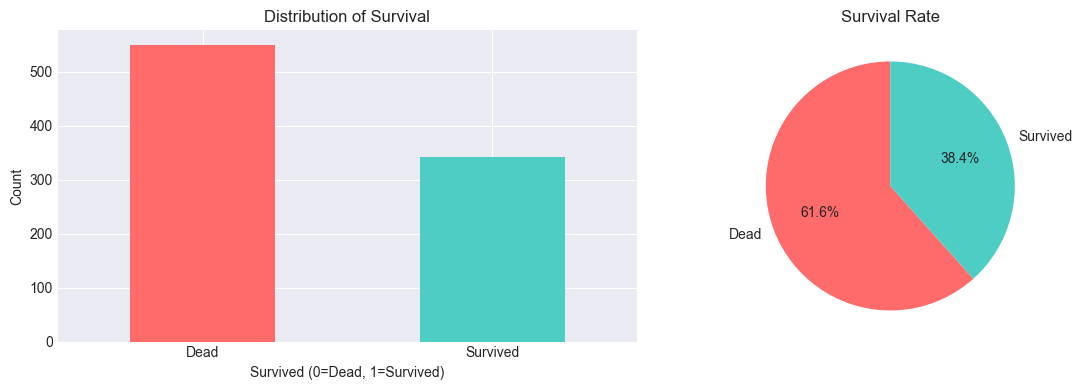

In [8]:
# 生存者の割合
survived_counts = train['Survived'].value_counts()
survived_ratio = train['Survived'].value_counts(normalize=True) * 100

print("Survival Count:")
print(survived_counts)
print("\nSurvival Rate:")
print(survived_ratio)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 棒グラフ
ax1 = axes[0]
survived_counts.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#4ecdc4'])
ax1.set_xlabel('Survived (0=Dead, 1=Survived)')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Survival')
ax1.set_xticklabels(['Dead', 'Survived'], rotation=0)

# 円グラフ
ax2 = axes[1]
ax2.pie(survived_counts, labels=['Dead', 'Survived'], autopct='%1.1f%%', 
        colors=['#ff6b6b', '#4ecdc4'], startangle=90)
ax2.set_title('Survival Rate')

plt.tight_layout()
plt.show()

## 5. 特徴量ごとの生存率分析

### 5.1 性別（Sex）と生存率

        Survived Count  Total  Survival Rate
Sex                                         
female             233    314          74.20
male               109    577          18.89


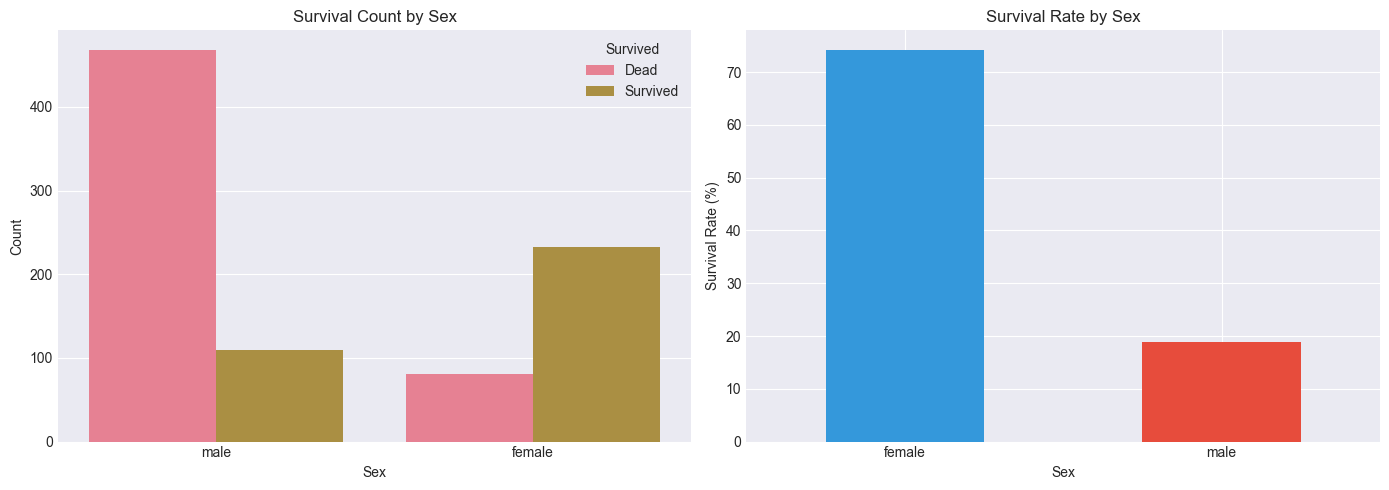

In [9]:
# 性別ごとの生存率
sex_survival = train.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
sex_survival.columns = ['Survived Count', 'Total', 'Survival Rate']
sex_survival['Survival Rate'] = (sex_survival['Survival Rate'] * 100).round(2)
print(sex_survival)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# カウントプロット
sns.countplot(data=train, x='Sex', hue='Survived', ax=axes[0])
axes[0].set_title('Survival Count by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].legend(['Dead', 'Survived'], title='Survived')

# 生存率の棒グラフ
sex_survival['Survival Rate'].plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_title('Survival Rate by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### 5.2 チケットクラス（Pclass）と生存率

        Survived Count  Total  Survival Rate
Pclass                                      
1                  136    216          62.96
2                   87    184          47.28
3                  119    491          24.24


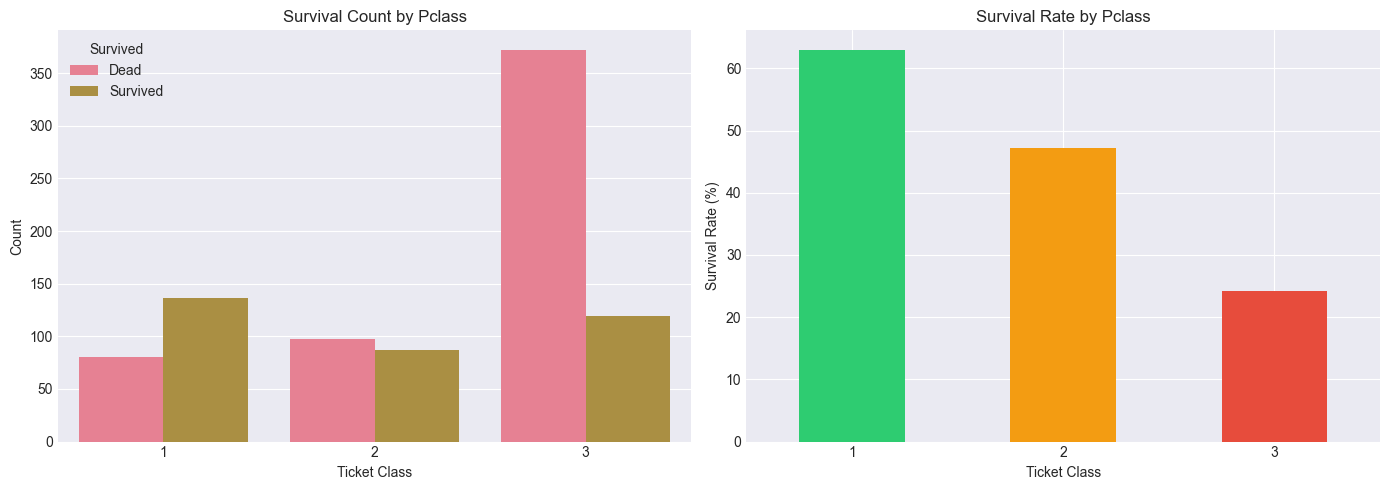

In [10]:
# クラスごとの生存率
pclass_survival = train.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
pclass_survival.columns = ['Survived Count', 'Total', 'Survival Rate']
pclass_survival['Survival Rate'] = (pclass_survival['Survival Rate'] * 100).round(2)
print(pclass_survival)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=train, x='Pclass', hue='Survived', ax=axes[0])
axes[0].set_title('Survival Count by Pclass')
axes[0].set_xlabel('Ticket Class')
axes[0].set_ylabel('Count')
axes[0].legend(['Dead', 'Survived'], title='Survived')

pclass_survival['Survival Rate'].plot(kind='bar', ax=axes[1], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[1].set_title('Survival Rate by Pclass')
axes[1].set_xlabel('Ticket Class')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### 5.3 性別 × クラスの組み合わせ

Survival Rate by Sex × Pclass (%)
Sex     Pclass
female  1         96.81
        2         92.11
        3         50.00
male    1         36.89
        2         15.74
        3         13.54
Name: Survived, dtype: float64


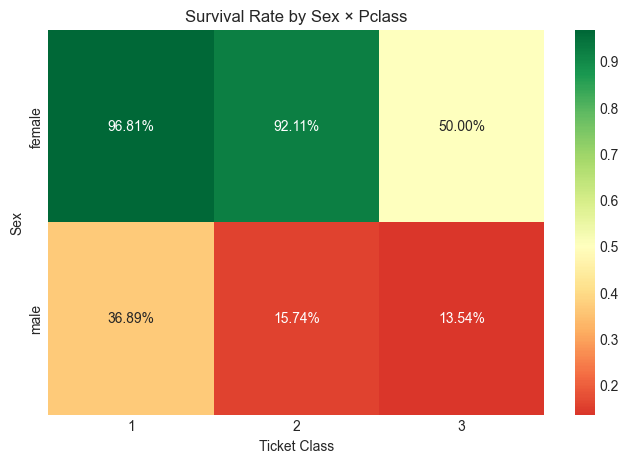

In [11]:
# 性別とクラスを組み合わせた生存率
sex_pclass_survival = train.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Survival Rate by Sex × Pclass (%)")
print(sex_pclass_survival.round(2))

# ヒートマップで可視化
pivot_table = train.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt='.2%', cmap='RdYlGn', center=0.5)
plt.title('Survival Rate by Sex × Pclass')
plt.xlabel('Ticket Class')
plt.ylabel('Sex')
plt.show()

### 5.4 年齢（Age）と生存率

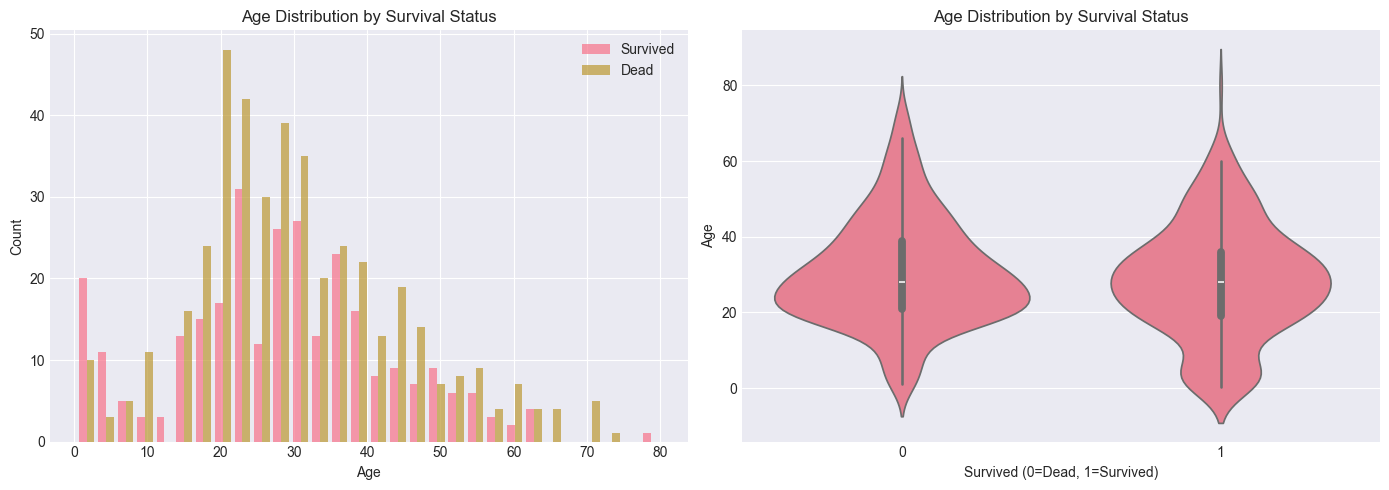


Survival Rate by Age Group (%)
AgeGroup
Child(0-12)      57.97
Teen(13-18)      42.86
Adult(19-35)     38.27
Middle(36-60)    40.00
Senior(60+)      22.73
Name: Survived, dtype: float64


/var/folders/tt/wjfl4v494091rmgr4ntqg1d80000gq/T/ipykernel_81064/3772863514.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train.groupby('AgeGroup')['Survived'].mean() * 100


In [12]:
# 年齢の分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ヒストグラム（生存/死亡別）
axes[0].hist([train[train['Survived']==1]['Age'].dropna(), 
              train[train['Survived']==0]['Age'].dropna()], 
             bins=30, label=['Survived', 'Dead'], alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution by Survival Status')
axes[0].legend()

# バイオリンプロット
sns.violinplot(data=train, x='Survived', y='Age', ax=axes[1])
axes[1].set_title('Age Distribution by Survival Status')
axes[1].set_xlabel('Survived (0=Dead, 1=Survived)')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

# 年齢グループ別の生存率
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], 
                           labels=['Child(0-12)', 'Teen(13-18)', 'Adult(19-35)', 
                                   'Middle(36-60)', 'Senior(60+)'])
age_survival = train.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival Rate by Age Group (%)")
print(age_survival.round(2))

### 5.5 家族サイズと生存率

            Survival Rate  Count
FamilySize                      
1                   30.35    537
2                   55.28    161
3                   57.84    102
4                   72.41     29
5                   20.00     15
6                   13.64     22
7                   33.33     12
8                    0.00      6
11                   0.00      7


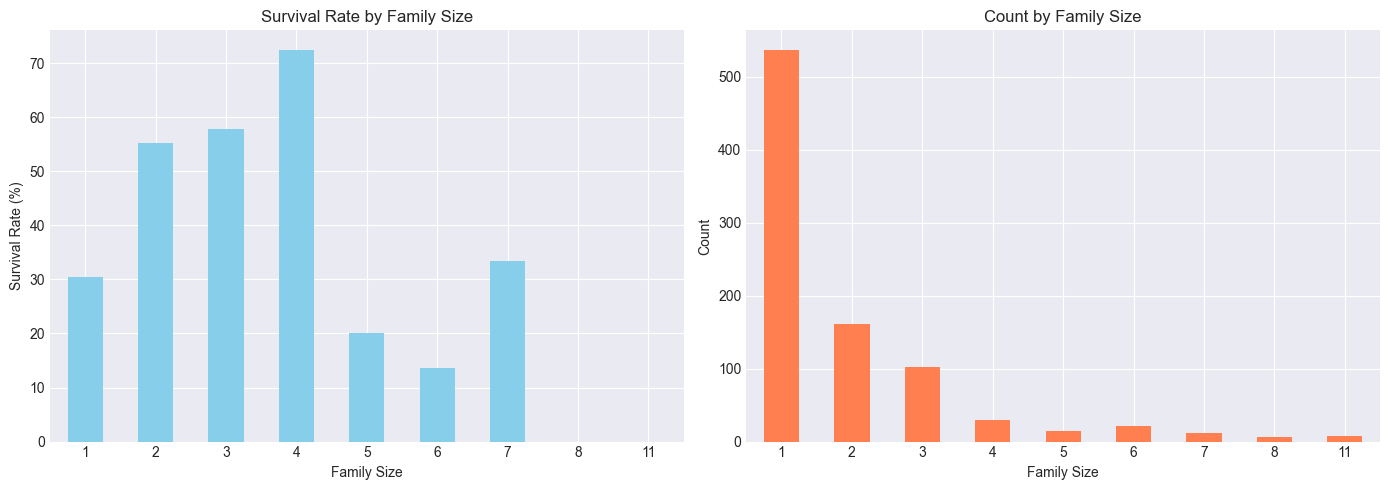

In [13]:
# 家族サイズ = SibSp（兄弟・配偶者） + Parch（親・子供） + 1（本人）
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# 家族サイズ別の生存率
family_survival = train.groupby('FamilySize')['Survived'].agg(['mean', 'count'])
family_survival.columns = ['Survival Rate', 'Count']
family_survival['Survival Rate'] = (family_survival['Survival Rate'] * 100).round(2)
print(family_survival)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

family_survival['Survival Rate'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Survival Rate by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Survival Rate (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

family_survival['Count'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Count by Family Size')
axes[1].set_xlabel('Family Size')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### 5.6 運賃（Fare）と生存率

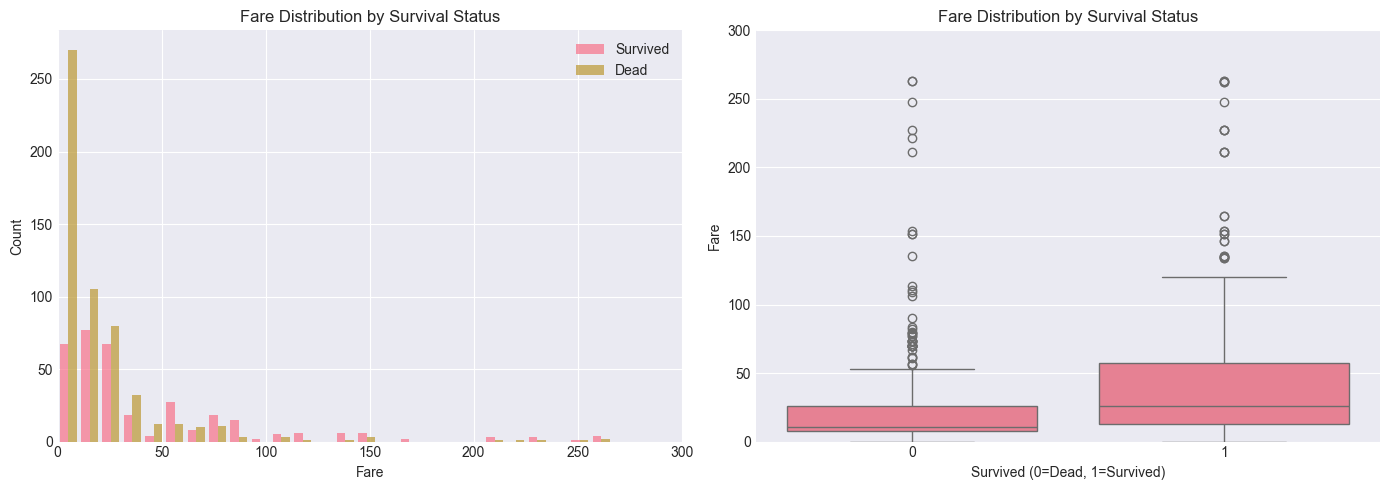

In [14]:
# 運賃の分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ヒストグラム（生存/死亡別）
axes[0].hist([train[train['Survived']==1]['Fare'], 
              train[train['Survived']==0]['Fare']], 
             bins=50, label=['Survived', 'Dead'], alpha=0.7)
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')
axes[0].set_title('Fare Distribution by Survival Status')
axes[0].legend()
axes[0].set_xlim(0, 300)

# ボックスプロット
sns.boxplot(data=train, x='Survived', y='Fare', ax=axes[1])
axes[1].set_title('Fare Distribution by Survival Status')
axes[1].set_xlabel('Survived (0=Dead, 1=Survived)')
axes[1].set_ylabel('Fare')
axes[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()

### 5.7 乗船港（Embarked）と生存率

          Survived Count  Total  Survival Rate
Embarked                                      
C                     93    168          55.36
Q                     30     77          38.96
S                    217    644          33.70


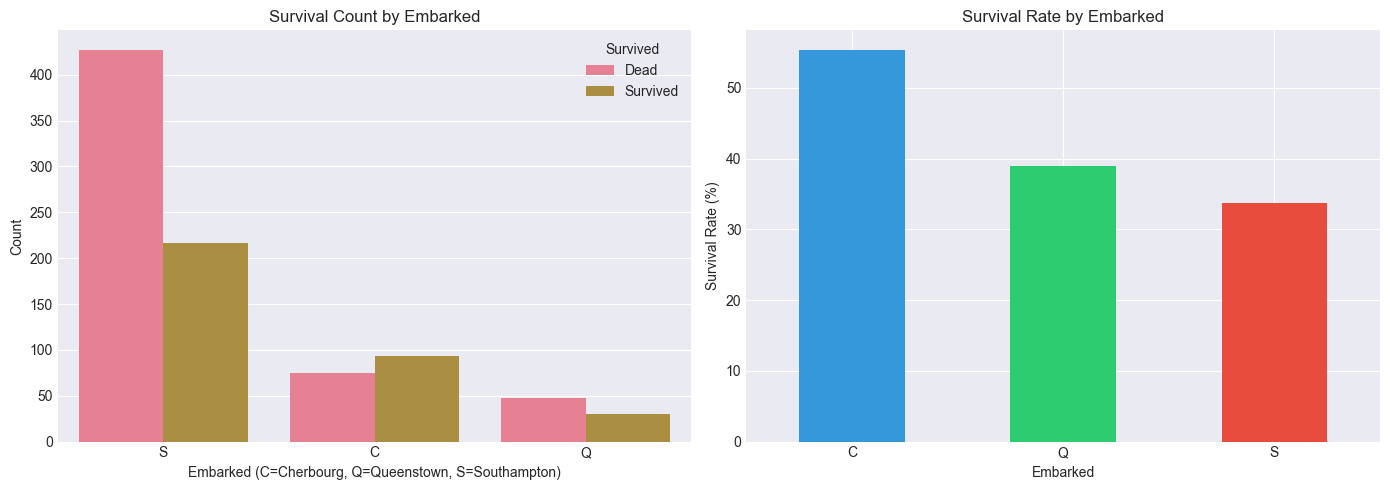

In [15]:
# 乗船港ごとの生存率
embarked_survival = train.groupby('Embarked')['Survived'].agg(['sum', 'count', 'mean'])
embarked_survival.columns = ['Survived Count', 'Total', 'Survival Rate']
embarked_survival['Survival Rate'] = (embarked_survival['Survival Rate'] * 100).round(2)
print(embarked_survival)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[0])
axes[0].set_title('Survival Count by Embarked')
axes[0].set_xlabel('Embarked (C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[0].set_ylabel('Count')
axes[0].legend(['Dead', 'Survived'], title='Survived')

embarked_survival['Survival Rate'].plot(kind='bar', ax=axes[1], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[1].set_title('Survival Rate by Embarked')
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 6. 相関分析

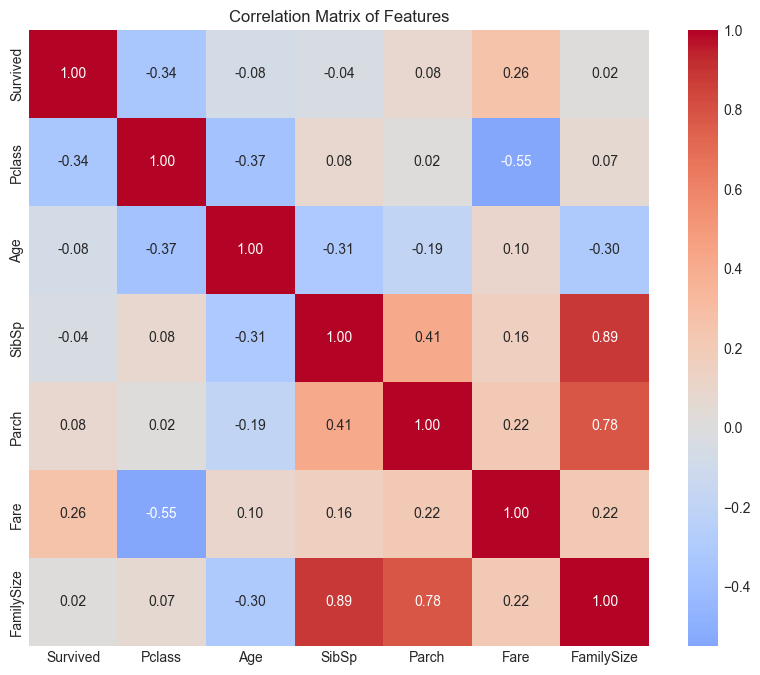


Correlation with Survived:
Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
Age          -0.077221
Pclass       -0.338481
Name: Survived, dtype: float64


In [16]:
# 数値変数の相関マトリックス
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
correlation_matrix = train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# Survivedとの相関を確認
print("\nCorrelation with Survived:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

## 7. まとめ

### EDAから得られた知見

1. **性別（Sex）**: 最も強力な予測因子
   - 女性の生存率: 約74%
   - 男性の生存率: 約19%
   - 「女性と子供を優先」の方針が反映されている

2. **チケットクラス（Pclass）**: 生存率に大きく影響
   - 1等: 約63%
   - 2等: 約47%
   - 3等: 約24%
   - 上位クラスほど救命ボートへのアクセスが良かった可能性

3. **年齢（Age）**: 子供の生存率が高い
   - 欠損値が約20%存在
   - 補完方法が重要

4. **家族サイズ（FamilySize）**: 中規模の家族（2-4人）の生存率が高い
   - 単身者や大家族は生存率が低い
   - 互いに助け合えるが、大きすぎると行動が遅れる?

5. **運賃（Fare）**: 高額運賃ほど生存率が高い
   - Pclassと強く相関

6. **乗船港（Embarked）**: 若干の差異あり
   - C（Cherbourg）からの乗客の生存率が高い
   - Pclassとの関連性がありそう

### 次のステップ
- 欠損値の補完戦略を決定
- 新しい特徴量の作成（タイトル抽出、家族サイズのカテゴリ化など）
- ベースラインモデルの構築